In [22]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_excel('datos-estadistica-platzi.xlsx')
# display(df.head())
display(df)

,ID,País,Estado Socioeconómico,Apps Descargadas,Tiempo en Celular (horas)
0,1,México,Medio,75,4.5
1,2,Colombia,Bajo,30,2.8
2,3,Argentina,Alto,120,7.1
3,4,México,Medio,60,5.0
4,5,Chile,Medio,85,6.3
5,6,Perú,Bajo,45,3.2
6,7,México,Medio,90,5.8
7,8,Colombia,Medio,70,4.1
8,9,Argentina,Medio,100,6.5
9,10,México,Bajo,50,3.9


In [24]:
df.isna().any().any()
if df.isna().any().any() is True:
    print("Hay valores nulos en el DataFrame")
else:
    print("No hay valores nulos en el DataFrame")


No hay valores nulos en el DataFrame


### _Tabla de frecuencias de pais_

In [25]:
frecuencias = (
    df['País'].value_counts()           # de mi dataframe original, selecciona todas las variables categoricas de pais y los cuenta
    .to_frame('Frecuencia Absoluta')    # convierte la serie en seleccionada del dataframe original y la convierte en un dataframe con el nombre de Frecuencia Absoluta
)
frecuencias = frecuencias.reset_index()
display(frecuencias)

,País,Frecuencia Absoluta
0,México,18
1,Colombia,10
2,Argentina,8
3,Chile,7
4,Perú,7


In [26]:
frecuencias['Frecuencia Relativa'] = (
    frecuencias['Frecuencia Absoluta'] / frecuencias['Frecuencia Absoluta'].sum()*100
)

frecuencias = frecuencias.reset_index()
display(frecuencias)

,index,País,Frecuencia Absoluta,Frecuencia Relativa
0,0,México,18,36.0
1,1,Colombia,10,20.0
2,2,Argentina,8,16.0
3,3,Chile,7,14.0
4,4,Perú,7,14.0


In [27]:
display(df.columns)

Index(['ID', 'País', 'Estado Socioeconómico', 'Apps Descargadas',
       'Tiempo en Celular (horas)'],
      dtype='object')

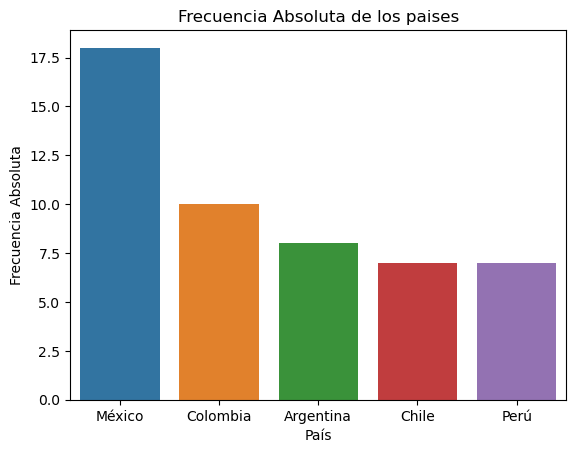

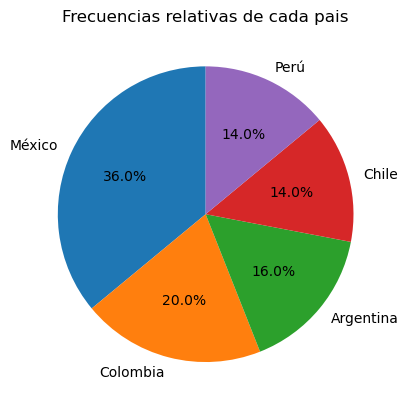

In [28]:
sns.barplot(
    data=frecuencias,
    x='País',
    y='Frecuencia Absoluta'
)
plt.title('Frecuencia Absoluta de los paises')
plt.show()

plt.pie(
    frecuencias['Frecuencia Absoluta'],
    labels      =frecuencias["País"],
    autopct     ='%1.1f%%',
    startangle  =90
)
plt.title('Frecuencias relativas de cada pais')
plt.show()

### _Tabla de frecuencias de "Estado Socioeconómico"_

In [29]:
frec_edo_soc = (
    df['Estado Socioeconómico'].value_counts()
    .to_frame('Frecuencia Absoluta')
)
frec_edo_soc = frec_edo_soc.reset_index()
display(frec_edo_soc)

,Estado Socioeconómico,Frecuencia Absoluta
0,Medio,30
1,Bajo,13
2,Alto,7


In [30]:
frec_edo_soc['Frecuencia Relativa'] = (
    (frec_edo_soc['Frecuencia Absoluta'] / frec_edo_soc['Frecuencia Absoluta'].sum()) * 100
)


In [31]:
frec_edo_soc['Frecuencia Acumulada'] = (
    frec_edo_soc['Frecuencia Absoluta'].cumsum()
)

frec_edo_soc = frec_edo_soc.reset_index()

display(frec_edo_soc)   # o deja frec_edo_soc como última línea de la celda

,index,Estado Socioeconómico,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
0,0,Medio,30,60.0,30
1,1,Bajo,13,26.0,43
2,2,Alto,7,14.0,50


/home/fcisnerosr/miniforge3/envs/estadistica-descriptiva/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


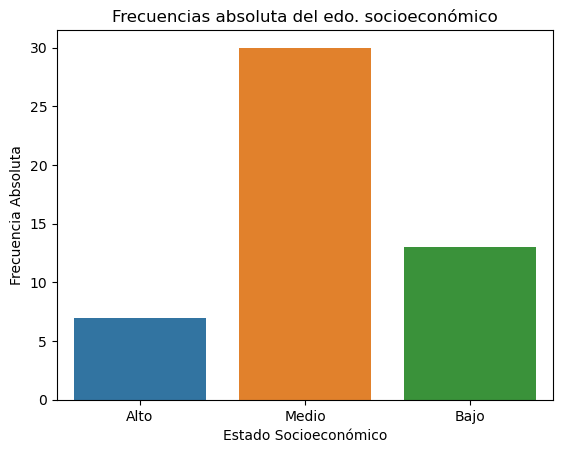

In [32]:
# Orden de variables categoricas
orden = ['Alto', 'Medio', 'Bajo']
frec_edo_soc['Estado Socioeconómico'] = (
    pd.Categorical(frec_edo_soc['Estado Socioeconómico'],
                    categories=orden,
                    ordered=True)
);
sns.barplot(data=frec_edo_soc, y='Frecuencia Absoluta', x='Estado Socioeconómico');
# plt.pie(data=frec_edo_soc, x='Frecuencia Absoluta')
plt.title('Frecuencias absoluta del edo. socioeconómico')
plt.show()

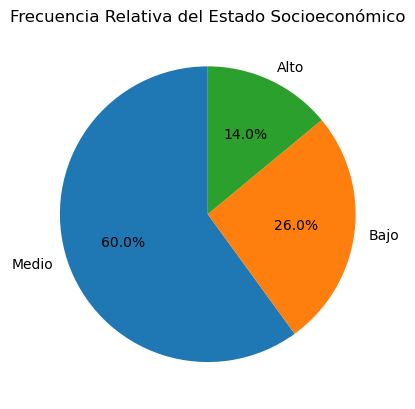

In [33]:
plt.pie(
    frec_edo_soc['Frecuencia Relativa'], 
    labels      = frec_edo_soc['Estado Socioeconómico'],
    autopct     = '%1.1f%%',
    startangle  = 90
)

plt.title('Frecuencia Relativa del Estado Socioeconómico')
plt.show()

In [34]:
# Tabla para graficar el Histograma de Tiempo en Celular (horas)
# 1) número de clases con Sturges
numero_total_de_datos = len(df['ID'])
k_horas = int(round(1 + np.log2(numero_total_de_datos)))

# 2) cortar en k clases tipo [a,b)

cats_hrs = pd.cut(
        df['Tiempo en Celular (horas)'], 
        bins=k_horas, 
        right=False, 
        include_lowest=True)

    
# # 3) frecuencias absolutas y relativas
freq_abs_hrs = cats_hrs.value_counts(sort=False)
freq_rel_hrs = cats_hrs.value_counts(sort=False, normalize=True)
freq_abs_acum_hrs = freq_abs_hrs.cumsum()
freq_rel_acum_hrs = freq_rel_hrs.cumsum()

In [35]:
# Tabla para graficar el Histograma de Apps Descargadas
k_app = round(1 + np.log2(len(df["ID"])))

cats_app = pd.cut(
        df['Apps Descargadas'],
        bins=k_app,
        right=False,
        include_lowest=True
)

frec_abs_app = cats_app.value_counts(sort=False)
frec_rel_app = cats_app.value_counts(sort=False, normalize=True)
frec_abs_acum_app = frec_abs_app.cumsum()
frec_rel_acum_app = frec_rel_app.cumsum()
# display(frec_abs_app)

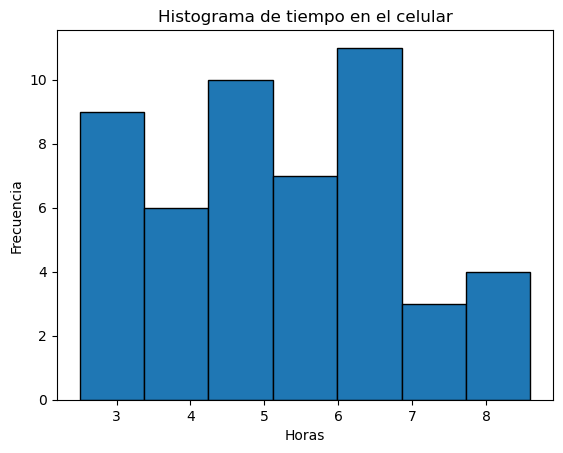

In [36]:
# plt.hist(df['Tiempo en Celular (horas)'], bins=k_horas, edgecolor='black')
plt.hist(df['Tiempo en Celular (horas)'], bins=k_horas, edgecolor='black')
plt.title('Histograma de tiempo en el celular')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()

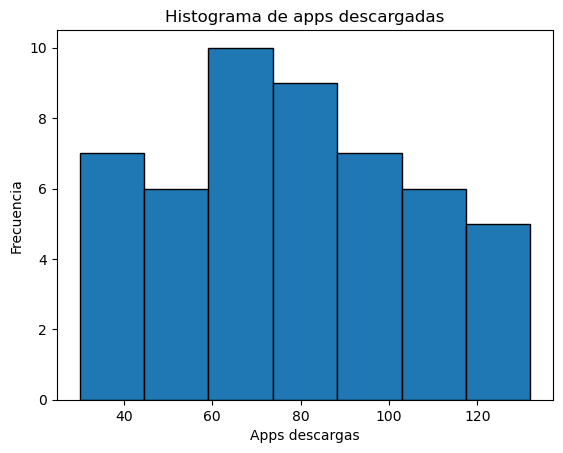

In [37]:
# Histograma de apps descargas
plt.hist(df['Apps Descargadas'], bins=k_app, edgecolor='black')
plt.title('Histograma de apps descargadas')
plt.xlabel('Apps descargas')
plt.ylabel('Frecuencia')
plt.show()

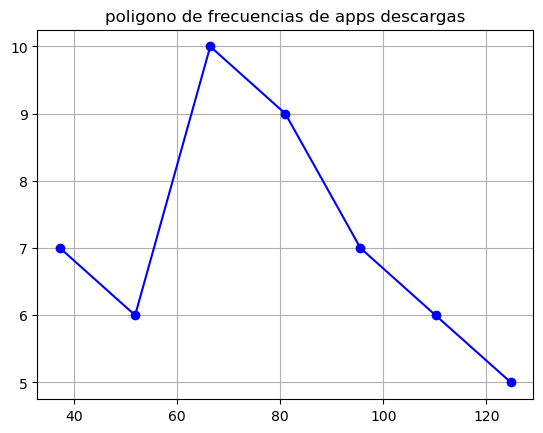

In [38]:
# Histograma de app descargadas
plt.plot(
    cats_app.cat.categories.mid,
    frec_abs_app,
    marker='o',
    linestyle='-',
    color='blue'
)
plt.title('poligono de frecuencias de apps descargas')
plt.grid(True)
plt.show()

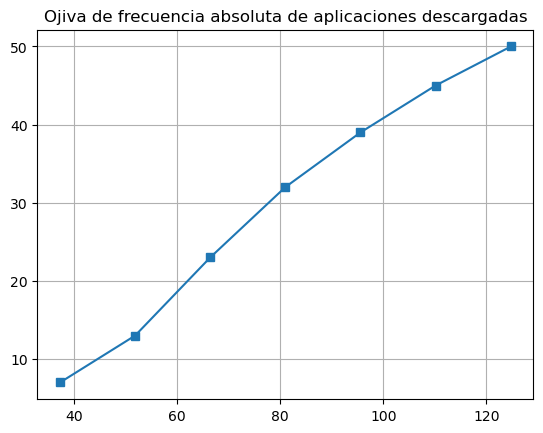

In [39]:
plt.plot(
    cats_app.cat.categories.mid, 
    np.cumsum(frec_abs_app), 
    marker='s', 
    label='Frec absoluta de apps descargadas'
)
plt.title('Ojiva de frecuencia absoluta de aplicaciones descargadas')
plt.grid(True)
plt.show()

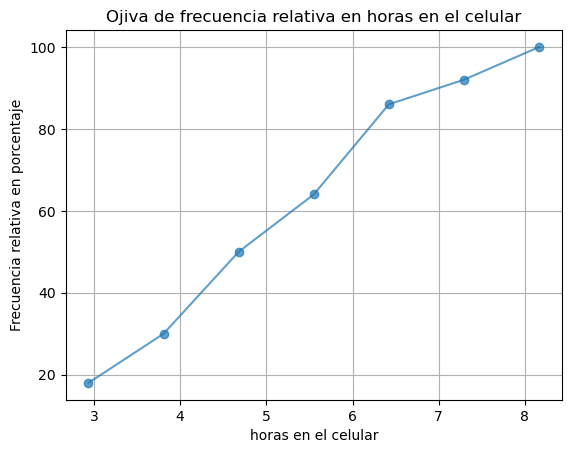

In [40]:
plt.plot(
    cats_hrs.cat.categories.mid, 
    np.cumsum(freq_rel_hrs*100), 
    marker='o', 
    linestyle='-',
    alpha=0.7,
    label='Frecuencia relativa de horas en el celular'
)
plt.grid(True)
plt.ylabel('Frecuencia relativa en porcentaje')
plt.xlabel('horas en el celular')
plt.title('Ojiva de frecuencia relativa en horas en el celular')
plt.show()

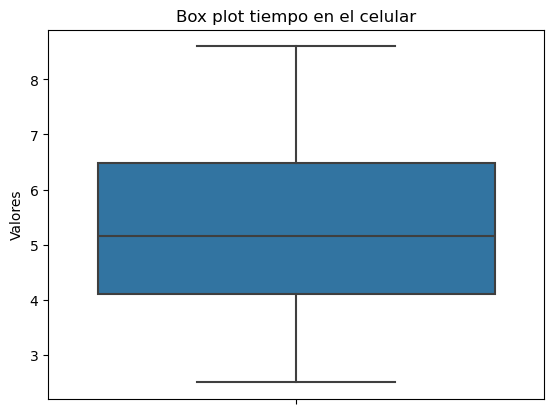

In [41]:
sns.boxplot(y=df['Tiempo en Celular (horas)'])
plt.title('Box plot tiempo en el celular')
plt.ylabel('Valores')
plt.show()

In [42]:
df.columns

Index(['ID', 'País', 'Estado Socioeconómico', 'Apps Descargadas',
       'Tiempo en Celular (horas)'],
      dtype='object')

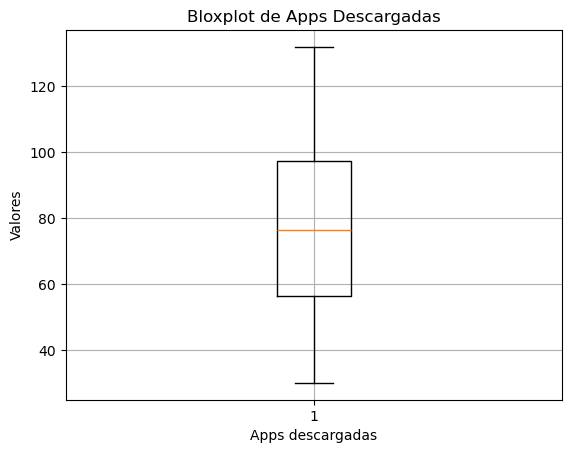

In [43]:
plt.boxplot(df['Apps Descargadas'])
plt.title('Bloxplot de Apps Descargadas')
plt.xlabel('Apps descargadas')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

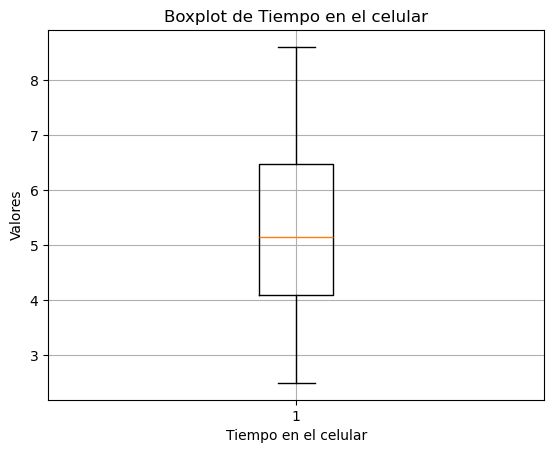

In [44]:
plt.boxplot(df['Tiempo en Celular (horas)'])
plt.title('Boxplot de Tiempo en el celular')
plt.grid(True)
plt.xlabel('Tiempo en el celular')
plt.ylabel('Valores')
plt.show()

In [45]:
print(df['Tiempo en Celular (horas)'].median())
print(df['Tiempo en Celular (horas)'].mode())
print(df['Tiempo en Celular (horas)'].mean())

5.15
0    5.0
Name: Tiempo en Celular (horas), dtype: float64
5.234


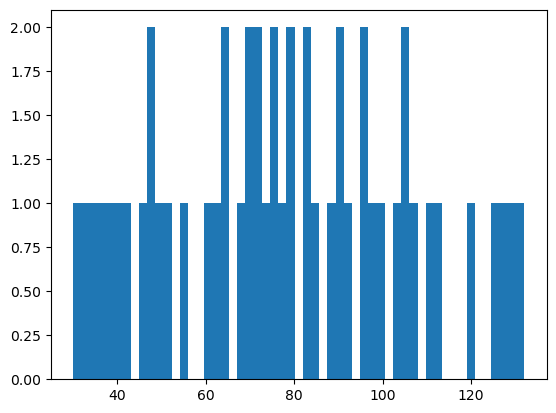

In [46]:
plt.hist(df['Apps Descargadas'], bins=55)
plt.show()

### Promedio de intervalos de clase

La media para datos agrupados en intervalos se calcula así:

$$
\bar{x} = \frac{\sum_{i=1}^{k} m_i \cdot f_i}{N}
$$

donde:

- $m_i$ = marca de clase del intervalo $i$ (punto medio)
- $f_i$ = frecuencia absoluta del intervalo $i$
- $N$ = suma total de frecuencias ($N = \sum_{i=1}^{k} f_i$)
- $k$ = número de intervalos

In [47]:
def promedio_grupal(data, bins):
    """
    Calcula el promedio grupal para datos agrupados en intervalos.

    Parámetros:
    data (array-like): Serie de datos numéricos.
    bins (int): Número de intervalos (clases).

    Retorna:
    float: Promedio grupal calculado.
    """
    frecuencias, limites = np.histogram(data, bins=bins)
    puntos_medios = (limites[:-1] + limites[1:]) / 2
    numerador = np.sum(frecuencias * puntos_medios)
    denominador = np.sum(frecuencias)
    promedio = numerador / denominador
    return promedio

In [48]:
prom_grupal_tiempo_celular = promedio_grupal(df['Tiempo en Celular (horas)'],k_horas)
prom_grupal_apps_descargad = promedio_grupal(df['Apps Descargadas'],k_app)

### Fórmula de la Mediana Grupal

La mediana para datos agrupados se calcula con la siguiente fórmula:

$$
\text{Mediana} = L + \left( \frac{\frac{N}{2} - F}{f} \right) \cdot a
$$

Donde:

- **L**: Límite inferior del intervalo de la mediana.
- **N**: Total de datos (suma de todas las frecuencias absolutas).
- **F**: Frecuencia acumulada antes del intervalo de la mediana.
- **f**: Frecuencia absoluta del intervalo de la mediana.
- **a**: Amplitud del intervalo de la mediana.

In [ ]:
# Cálculo de la mediana grupal

# Paso 1: Leer los datos y agrupar en intervalos
# ---------------------------------------------
import pandas as pd
df = pd.read_excel('datos-estadistica-platzi.xlsx')

In [ ]:
def mediana_grupal(df,columna,k_app):
    group = pd.cut(
    df[columna], 
    bins=k_app, 
    right=True, 
    include_lowest=True
    )

    # Paso 2: Calcular la frecuencia acumulada y el total de datos
    # ------------------------------------------------------------
    frecu_acum  = group.value_counts().cumsum()
    N_entre_2   = group.value_counts().sum() / 2

    # Paso 3: Identificar el intervalo de la mediana
    # ----------------------------------------------
    intervalo_mitad = frecu_acum[frecu_acum <= N_entre_2]
    limite_infer    = intervalo_mitad.index[-1].left
    amplitud_clase  = intervalo_mitad.index[-1].right - intervalo_mitad.index[-1].left

    # Paso 4: Calcular la frecuencia acumulada anterior y la frecuencia del intervalo
    # -------------------------------------------------------------------------------
    frec_acum_interv_ant = intervalo_mitad.cumsum().iloc[-1]
    frec_inter_med       = intervalo_mitad.iloc[-1]

    # Paso 5: Aplicar la fórmula de la mediana grupal
    # -----------------------------------------------
    mediana_grup = limite_infer + (
        (N_entre_2 - frec_acum_interv_ant) / frec_inter_med
    ) * amplitud_clase

    # Mostrar el resultado
    # print("Mediana grupal:", mediana_grup)
    return mediana_grup

In [73]:
df.columns

Index(['ID', 'País', 'Estado Socioeconómico', 'Apps Descargadas',
       'Tiempo en Celular (horas)'],
      dtype='object')

In [78]:
mg_app = mediana_grupal(df,'Apps Descargadas',k_app)
mg_hrs = mediana_grupal(df,'Tiempo en Celular (horas)',k_horas)

3.952666666666667
5.15


In [ ]:
# Variabilidad de datos agrupados
# cvg_apps = 

### _Variabilidad_

In [88]:
# Rango
rango_hrss = np.ptp(df['Tiempo en Celular (horas)'])
rango_apps = np.ptp(df['Apps Descargadas'])
print(rango_hrss)
print(rango_apps)

6.1
102


In [90]:
# Desviación estandar
std_dev_hrss = np.std(df['Tiempo en Celular (horas)'])
std_dev_apps = np.std(df['Apps Descargadas'])
print(std_dev_hrss)
print(std_dev_apps)

1.602074904615886
27.49668343637101


In [95]:
# Coefiente de variación
cv_apps = (std_dev_apps / np.mean(df["Apps Descargadas"])*100)
cv_hrss = (std_dev_hrss / np.mean(df["Tiempo en Celular (horas)"])*100)
print(cv_apps)
print(cv_hrss)

35.33369755380495
30.608997031254987
